## Context:
The World Happiness Report is a landmark survey of the state of global happiness. 
The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


## Content
the happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.
The columns following the happiness score estimate the extent to which each of six factors – GDP per capita, social support, life expectancy, freedom, Perceptions of corruption, and generosity – contribute to making life evaluations higher in each country 

## Data Science question: WHAT MAKES A COUNTRY HAPPY?

Guide:
- How does each  srtong happiness factor correlate with one another in 2021?
- What is mean of corruption in all countries in Regional indicator in 2021? 
- What the happiest and saddiest countries (top 10 and bottom 10 in 2021)?
- How is the Healthy life expectancy factor in the happiest and saddiest counries in 2021?


## Algoithms Performed below

### Regression Algorithm
1)KNN Regressor 2)Linear Regressor 3)Decision Tree Regressor 4)Random Forest Regressor 5)Support Vector Regressor 6)XG Boost Regressor

## merge two datasets

### Data source: https://www.kaggle.com


### Import Libraries 


In [1]:
!pip install plotly 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.metrics import classification_report

%matplotlib inline

### read  and cleaning data 

In [2]:
#Import two Datasets
data2021=pd.read_csv('world-happiness-report-2021.csv')
data=pd.read_csv('world-happiness-report.csv')

In [3]:
# Get the overview of the data2021
data2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
#describe of data2021
data2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [5]:
# Information about the Variables
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
#missing data
data2021.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [7]:
#columns in data2021
data2021.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [8]:
#size of data2021
data2021.shape

(149, 20)

In [9]:
#drop unnecessary columns
data2021 = data2021.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Ladder score in Dystopia',
                          'Dystopia + residual'], axis = 1)

In [10]:
data2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [11]:
# Get the overview of the data
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [12]:
#describe of data
data.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [13]:
# Information about the Variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [14]:
# Get the overview of the data
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [15]:
#missing data
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [16]:
#drop missing
data=data.dropna()

In [17]:
data.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [18]:
#columns in data
data.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [19]:
#size of data
data.shape

(1708, 11)

In [20]:
#drop unnecessary columns
data= data.drop(['Positive affect', 'Negative affect'], axis = 1)

In [21]:
#rename some columns
data.rename(columns = {'Life Ladder': 'Ladder score',
                       'Log GDP per capita':'Logged GDP per capita'
                       ,'Healthy life expectancy at birth':'Healthy life expectancy'},inplace='True')


In [22]:
data.head()

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


## Description of  columns in dataset

#### [Country name]:
Name of each Country

#### [Life Ladder] :
A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

#### [Logged GDP per capita ]:
GDP per Capita of each Country in terms of Puchasing Power Parity (PPP) (in USD)

#### [Healthy life expectancy] : 
Healthy Life Expectancy at birth are constructed based on data from the World Health Organization (WHO) and WDI.

#### [Social support ]:
National average of the binary responses (either 0 or 1) to the question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

#### [Freedom to make life choices] :
National average of binary responses to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

#### [Generosity ]: 
Generosity is the residual of regressing the national average of responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.

#### [Perceptions of corruption ]:
Perceptions of corruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”

# General Analysis

### Take a closer look - how each factor affects overall happiness or one another

Logged GDP per capita, Social Support, and Healthy Life Expectancy have a strong degree of relationship with the Ladder Score. As each of these factors increases, the overall Ladder Score increases as well.


### Factor to factor analysis shows strong degree of relationship between the following:

##  Logged GDP per capita and Ladder Score relationship:  

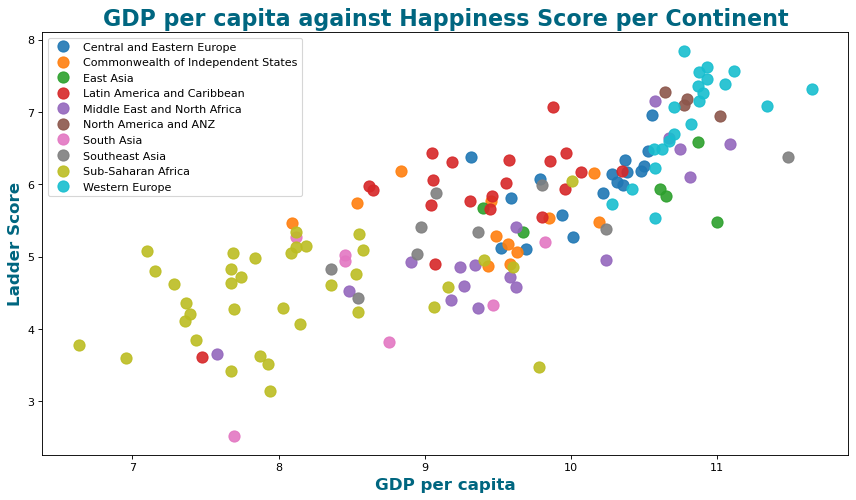

In [23]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = data2021.groupby("Regional indicator")
for name, group in groups:
    plt.plot(group["Logged GDP per capita"], group["Ladder score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Ladder Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('GDP per capita against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

## Social_Support and Ladder Score relationship:

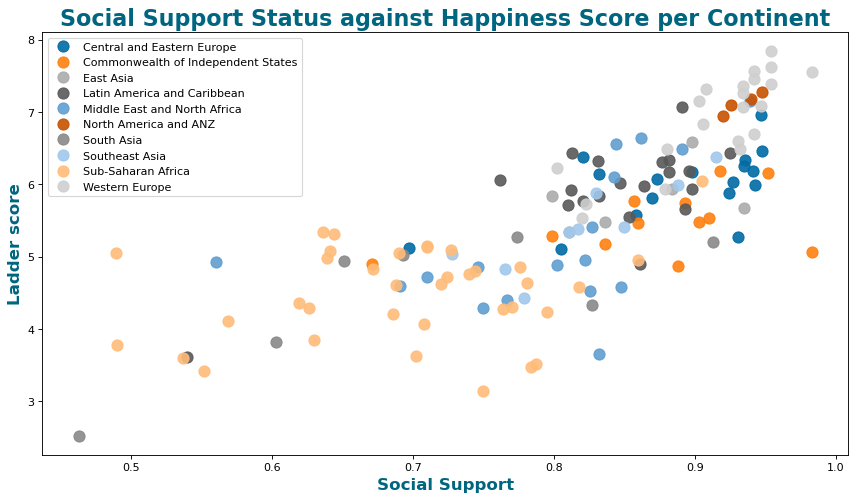

In [24]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = data2021.groupby("Regional indicator")
for name, group in groups:
    plt.plot(group["Social support"], group["Ladder score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Ladder score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Social Support Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

## Healthy Life Expectancy and Ladder Score relationship:

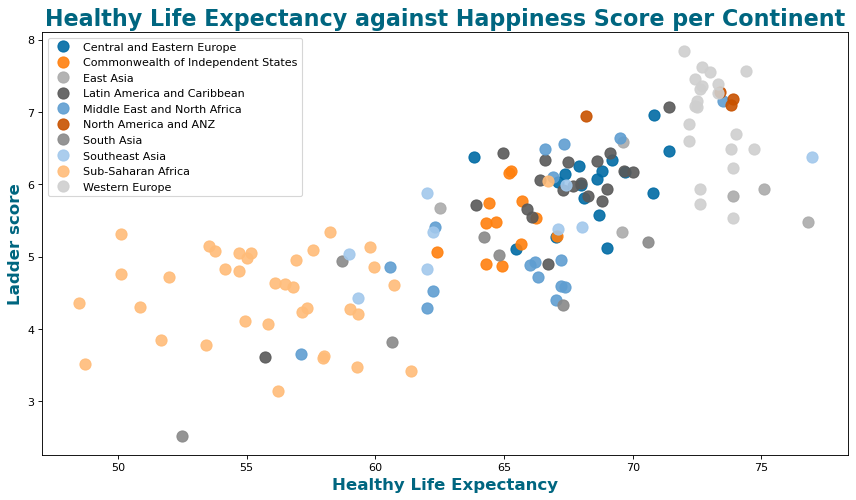

In [25]:
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10') #style.available
groups = data2021.groupby("Regional indicator")
for name, group in groups:
    plt.plot(group["Healthy life expectancy"], group["Ladder score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Healthy Life Expectancy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Ladder score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Healthy Life Expectancy against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

In [26]:
#total of countries in regional indicator
total_countries=data2021.groupby('Regional indicator')['Country name'].count()

In [27]:
total_countries

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64

## mean of corruption 

In [28]:
corruption=data2021.groupby('Regional indicator')[['Perceptions of corruption']].mean()

In [29]:
corruption

,Perceptions of corruption
Regional indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


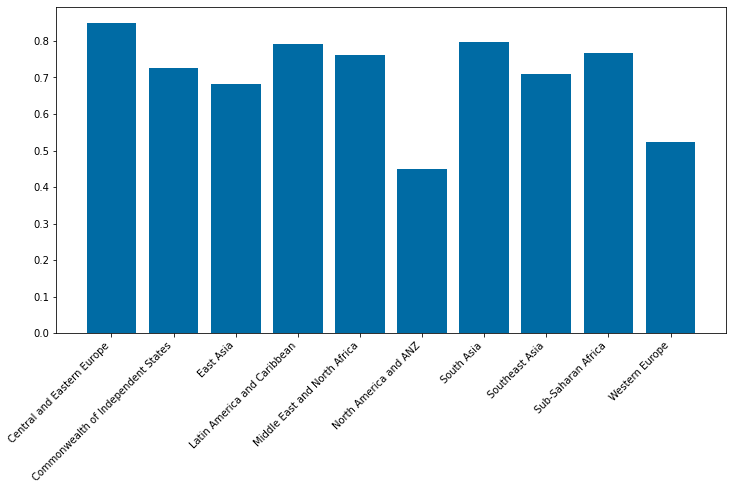

In [30]:
plt.rcParams['figure.figsize']=(12,6)
plt.title=('Perceptions of corruption in regions')
plt.xlabel=('Regions')
plt.ylabel=('Perceptions of corruption')
plt.xticks(rotation=45, ha='right') 
plt.bar(corruption.index,corruption['Perceptions of corruption']);



## Top 10 and Bottom 10 countries

In [31]:
# Sort the dataset in 2021 
top_10 = data2021.sort_values(by='Ladder score', ascending=False).head(10)
bottom_10 = data2021.sort_values(by='Ladder score', ascending=False).tail(10)

In [32]:
#Top 10 of happiest country
top_10

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [33]:
#Top 10 of saddest country
bottom_10

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


## Healthy life expectancy in happiest countries and saddiest countries

/var/folders/9t/64tm8pcn4vjg_vv49fm471rw0000gn/T/ipykernel_24681/3693299084.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(top,rotation=45,ha='right')
/var/folders/9t/64tm8pcn4vjg_vv49fm471rw0000gn/T/ipykernel_24681/3693299084.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(bottom,rotation=45,ha='right')


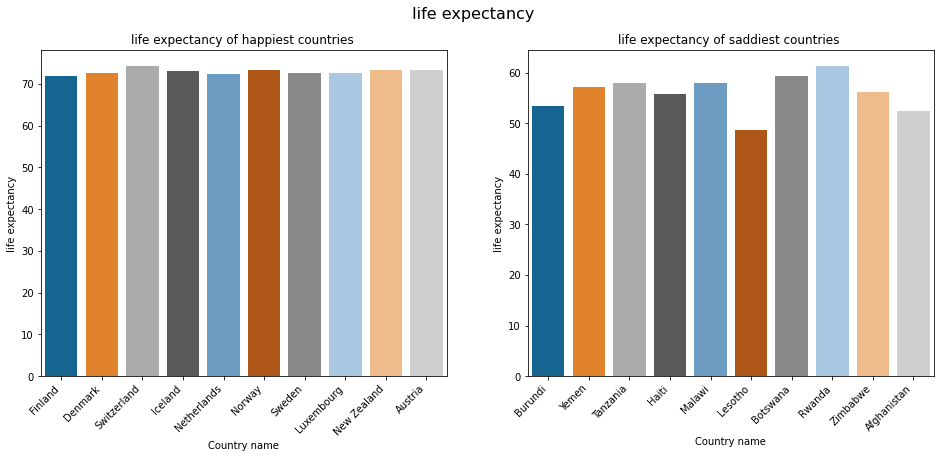

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

top=top_10['Country name']

fig.suptitle(' life expectancy ',fontsize = 16)

ax[0].set_xticklabels(top,rotation=45,ha='right')
ax[0].set_title('life expectancy of happiest countries ')

sns.barplot(x=top_10['Country name'],y=top_10['Healthy life expectancy'],ax=ax[0])
ax[0].set_xlabel('Country name')
ax[0].set_ylabel('life expectancy')

bottom=bottom_10['Country name']



ax[1].set_xticklabels(bottom,rotation=45,ha='right')
ax[1].set_title('life expectancy of saddiest countries ')

sns.barplot(x=bottom_10['Country name'],y=bottom_10['Healthy life expectancy'],ax=ax[1])
ax[1].set_xlabel('Country name')
ax[1].set_ylabel('life expectancy');



# Models

# KNN Regressor Algorithm Implementation


In [35]:

x=data2021.drop(["Ladder score"],axis=1)
y=data2021[["Ladder score"]]

In [36]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [37]:
df1=le.fit_transform(x["Country name"])
x["Country name"]= df1
df1=le.fit_transform(x["Regional indicator"])
x["Regional indicator"]= df1

### Preprocessing of data 

In [38]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X=pd.DataFrame(scaler1.fit_transform(x),columns=x.columns)
X.head()

,Country name,Regional indicator,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-0.790484,1.254062,1.162885,1.216171,1.039750,1.393550,-0.551886,-3.031228
1,-0.953231,1.254062,1.299717,1.216171,1.143618,1.366990,0.300594,-3.070416
2,1.255474,1.254062,1.459064,1.111370,1.395869,1.127948,0.267294,-2.437802
3,-0.464991,1.254062,1.252086,1.469440,1.188133,1.446671,1.166393,-0.304829
4,0.511490,1.254062,1.298851,1.111370,1.099103,1.074828,1.266293,-2.180278


In [39]:
y.head()

,Ladder score
0,7.842
1,7.620
2,7.571
3,7.554
4,7.464


## Train_Test_split 

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)
print(X_train.shape)
print(X_test.shape)

(119, 8)
(30, 8)


## KNN Regressor 

In [41]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()

In [42]:
knnreg = KNR.fit(X_train, y_train)

In [43]:
predictions = knnreg.predict(X_test)

TypeError: 'str' object is not callable

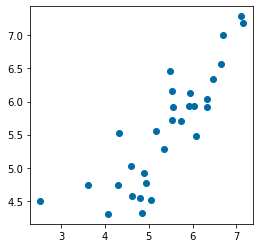

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions)
plt.title("Actual happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

In [ ]:
#checking the errors and r2 error
MAE_KNN= mean_absolute_error(y_test, predictions)
MSE_KNN= mean_squared_error(y_test, predictions)
R2_KNN = r2_score(y_test, predictions)

print("THe MAE of the KNN_regression is:", MAE_KNN)
print("THe MSE of the KNN_regression is:", MSE_KNN)
print("THe R^2 of the KNN_regression is:", R2_KNN)

In [45]:
df_table = pd.DataFrame(columns=["Model","Mean Absolute Error","Mean Squared Error","R Squared Error"])

dict1 = {
"Model" : "KNN_REGRESSOR",
"Mean Absolute Error" : mean_absolute_error(y_test, predictions),
"Mean Squared Error" :mean_squared_error(y_test, predictions),
"R Squared Error" : r2_score(y_test, predictions),
}
df_table = df_table.append(dict1,ignore_index = True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,0.39828,0.341891,0.677368


## Linear Regression 

In [46]:
#Linear Regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [47]:
lin_reg.fit(X_train,y_train)
#print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

LinearRegression()

In [48]:
predictions_1= lin_reg.predict(X_test)
#lin_reg.predict([[43,1.340,1.587,0.986,0.596,0.393]])

In [49]:
#finding the intercept
intercept = lin_reg.intercept_[0]
print("The intercept for the model is {}".format(intercept))

The intercept for the model is 5.550604570952311


In [50]:
#checking the errors and r2 error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE_LR= mean_absolute_error(y_test, predictions_1)
MSE_LR= mean_squared_error(y_test, predictions_1)
R2_LR = r2_score(y_test, predictions_1)

print("THe MAE of the Linear_regression is:", MAE_LR)
print("THe MSE of the Linear_regression is:", MSE_LR)
print("THe R^2 of the Linear_regression is:", R2_LR)

THe MAE of the Linear_regression is: 0.38040182564004554
THe MSE of the Linear_regression is: 0.2401828467207272
THe R^2 of the Linear_regression is: 0.7733466507728999


In [51]:
dict2= {"Model" : "LINEAR_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_1),
"Mean Squared Error":mean_squared_error(y_test, predictions_1),
"R Squared Error" : r2_score(y_test, predictions_1)
}
df_table = df_table.append(dict2,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,0.398280,0.341891,0.677368
1,LINEAR_REGRESSOR,0.380402,0.240183,0.773347


TypeError: 'str' object is not callable

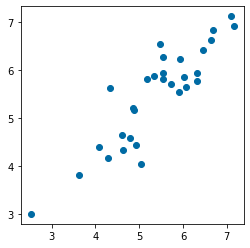

In [52]:
#Vizualization
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions_1)
plt.title("Actual happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

# Support Vector Regressor

In [53]:
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(X_train,np.array(y_train).ravel())

SVR()

In [54]:
predictions_2=regressor.predict(X_test)

In [55]:
MAE_SVR = mean_absolute_error(y_test, predictions_2)
MSE_SVR = mean_squared_error(y_test, predictions_2)
R2_SVR = r2_score(y_test, predictions_2)
print("THe MAE of the Support_Vector_Regressor is:", MAE_SVR)
print("THe MSE of the Support_Vector_Regressor is:", MSE_SVR)
print("THe R^2 of the Support_Vector_Regressor is:", R2_SVR)

THe MAE of the Support_Vector_Regressor is: 0.41502675631552466
THe MSE of the Support_Vector_Regressor is: 0.3815743250334292
THe R^2 of the Support_Vector_Regressor is: 0.639919753101863


In [56]:
dict3= {"Model" : "SUPPORT_VECTOR_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_2),
"Mean Squared Error":mean_squared_error(y_test, predictions_2),
"R Squared Error" : r2_score(y_test, predictions_2)
}
df_table = df_table.append(dict3,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,0.398280,0.341891,0.677368
1,LINEAR_REGRESSOR,0.380402,0.240183,0.773347
2,SUPPORT_VECTOR_REGRESSOR,0.415027,0.381574,0.639920


TypeError: 'str' object is not callable

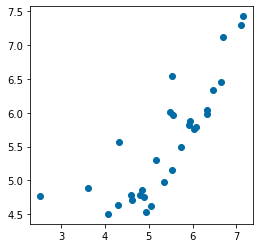

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions_2)
plt.title("Actual happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

# Decision Tree Regressor 

In [58]:
#decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [59]:
predictions_3=regressor.predict(X_test)

In [60]:
MAE_DTR = mean_absolute_error(y_test, predictions_3)
MSE_DTR = mean_squared_error(y_test, predictions_3)
R2_DTR = r2_score(y_test, predictions_3)
print("THe MAE of the Decision_Tree is:", MAE_DTR)
print("THe MSE of the Decision_Tree is:", MSE_DTR)
print("THe R^2 of the Decision_Tree is:", R2_DTR)

THe MAE of the Decision_Tree is: 0.6723333333333333
THe MSE of the Decision_Tree is: 0.6530973333333333
THe R^2 of the Decision_Tree is: 0.38369163330216505


In [61]:
dict4= {"Model" : "DECISION_TREE_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_3),
"Mean Squared Error":mean_squared_error(y_test, predictions_3),
"R Squared Error" : r2_score(y_test, predictions_3)
}
df_table = df_table.append(dict4,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,0.398280,0.341891,0.677368
1,LINEAR_REGRESSOR,0.380402,0.240183,0.773347
2,SUPPORT_VECTOR_REGRESSOR,0.415027,0.381574,0.639920
3,DECISION_TREE_REGRESSOR,0.672333,0.653097,0.383692


TypeError: 'str' object is not callable

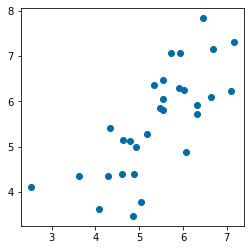

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions_3)
plt.title("Actaul happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

# Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params_to_test = {
    'n_estimators':range(1,11)
}

rf_model=RandomForestRegressor()

In [64]:
grid_search=GridSearchCV(rf_model, param_grid=params_to_test)

grid_search.fit(X_train,np.array(y_train).ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': range(1, 11)})

In [65]:
predictions_4=grid_search.predict(X_test)

In [66]:
MAE_RF = mean_absolute_error(y_test, predictions_4)
MSE_RF = mean_squared_error(y_test, predictions_4)
R2_RF = r2_score(y_test, predictions_4)
print("THe MAE of the Random_forest is:",MAE_RF)
print("THe MSE of the Random_forest is:", MSE_RF)
print("THe R^2 of the Random_forest is:", R2_RF)

THe MAE of the Random_forest is: 0.44400666666666655
THe MSE of the Random_forest is: 0.3192767906666666
THe R^2 of the Random_forest is: 0.6987080679444924


TypeError: 'str' object is not callable

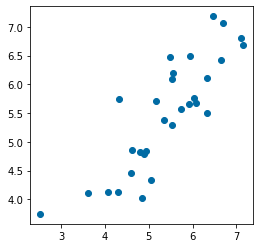

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions_4)
plt.title("Actual happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

In [68]:
dict5= {"Model" : "RANDOM_FOREST_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_4),
"Mean Squared Error":mean_squared_error(y_test, predictions_4),
"R Squared Error" : r2_score(y_test, predictions_4)
}
df_table = df_table.append(dict5,ignore_index=True)
df_table

,Model,Mean Absolute Error,Mean Squared Error,R Squared Error
0,KNN_REGRESSOR,0.398280,0.341891,0.677368
1,LINEAR_REGRESSOR,0.380402,0.240183,0.773347
2,SUPPORT_VECTOR_REGRESSOR,0.415027,0.381574,0.639920
3,DECISION_TREE_REGRESSOR,0.672333,0.653097,0.383692
4,RANDOM_FOREST_REGRESSOR,0.444007,0.319277,0.698708


In [69]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from xgboost import XGBRegressor
xgreg = XGBRegressor()
xgreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
predictions_5 = xgreg.predict(X_test)

In [72]:
MAE_RF = mean_absolute_error(y_test, predictions_5)
MSE_RF = mean_squared_error(y_test, predictions_5)
R2_RF = r2_score(y_test, predictions_5)
print("THe MAE of the XG Boost Regressor is:",MAE_RF)
print("THe MSE of the XG Boost Regressor  is:", MSE_RF)
print("THe R^2 of the XG Boost Regressor  is:", R2_RF)

THe MAE of the XG Boost Regressor is: 0.33036000518798825
THe MSE of the XG Boost Regressor  is: 0.20255680351365604
THe R^2 of the XG Boost Regressor  is: 0.8088532193204959


TypeError: 'str' object is not callable

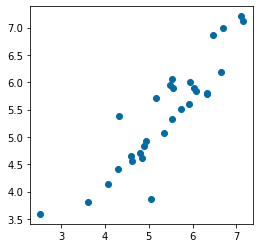

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(y_test,predictions_5)
plt.title("Actual happiness score vs predicted happiness scores")
plt.xlabel("Actual happiness scores")
plt.ylabel("Predicted happiness scores")
plt.show()

In [ ]:
dict6= {"Model" : "XG_BOOST_REGRESSOR",
    "Mean Absolute Error": mean_absolute_error(y_test, predictions_5),
"Mean Squared Error":mean_squared_error(y_test, predictions_5),
"R Squared Error" : r2_score(y_test, predictions_5)
}
df_table = df_table.append(dict6,ignore_index=True)
df_table

# Conclusion
XGBoost regressor is giving the best results

# merge two datasets

In [74]:
#drop a column we don't need
data2021 = data2021.drop(['Regional indicator'],axis=1)
#Add year feature for data2021
data2021['year']=2021
new_data=pd.merge(data,data2021,how='outer')

### review and cleaning new data

In [75]:
new_data

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,3.724,7.370,0.451,50.800,0.718,0.168,0.882
1,Afghanistan,2009,4.402,7.540,0.552,51.200,0.679,0.190,0.850
2,Afghanistan,2010,4.758,7.647,0.539,51.600,0.600,0.121,0.707
3,Afghanistan,2011,3.832,7.620,0.521,51.920,0.496,0.162,0.731
4,Afghanistan,2012,3.783,7.705,0.521,52.240,0.531,0.236,0.776
...,...,...,...,...,...,...,...,...,...
1852,Lesotho,2021,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
1853,Botswana,2021,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
1854,Rwanda,2021,3.415,7.676,0.552,61.400,0.897,0.061,0.167
1855,Zimbabwe,2021,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [76]:
#size of new data
new_data.shape

(1857, 9)

In [77]:
# Information about the Variables
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1857 entries, 0 to 1856
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  1857 non-null   object 
 1   year                          1857 non-null   int64  
 2   Ladder score                  1857 non-null   float64
 3   Logged GDP per capita         1857 non-null   float64
 4   Social support                1857 non-null   float64
 5   Healthy life expectancy       1857 non-null   float64
 6   Freedom to make life choices  1857 non-null   float64
 7   Generosity                    1857 non-null   float64
 8   Perceptions of corruption     1857 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 145.1+ KB


In [78]:
#missing data
new_data.isnull().sum()

Country name                    0
year                            0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [79]:
#finding the correlation of the new_data
corr=new_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
year,1.000000,0.064171,0.090051,0.013482,0.185613,0.264187,-0.041746,-0.100054
Ladder score,0.064171,1.000000,0.792625,0.716365,0.755120,0.528963,0.167975,-0.446527
Logged GDP per capita,0.090051,0.792625,1.000000,0.711879,0.859453,0.358373,-0.038199,-0.343938
Social support,0.013482,0.716365,0.711879,1.000000,0.623813,0.414582,0.043773,-0.225320
Healthy life expectancy,0.185613,0.755120,0.859453,0.623813,1.000000,0.392673,0.004725,-0.338215
Freedom to make life choices,0.264187,0.528963,0.358373,0.414582,0.392673,1.000000,0.312524,-0.482894
Generosity,-0.041746,0.167975,-0.038199,0.043773,0.004725,0.312524,1.000000,-0.278394
Perceptions of corruption,-0.100054,-0.446527,-0.343938,-0.225320,-0.338215,-0.482894,-0.278394,1.000000
